In this exercise we have to explore the solution of non=linear differential equations using RK4, Adams-Multon without corrector and Adam's-Multon with corrector methods.

For the testing we have the following non-linear differential equation:

$y' = y + x^{2} - 2x + sin(x)$

$y[0] = 0.1$

First, we have defined the function and all three methods in Python:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return y + x**2 - 2*x + np.sin(x)

def rk4_step(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h / 2, y + k1 / 2)
    k3 = h * f(x + h / 2, y + k2 / 2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def adams_moulton_step(x, y, h, corrector=False):
    yp = y + h * f(x, y)
    if not corrector:
        return y + h / 2 * (f(x, y) + f(x + h, yp))
    yc = yp
    for _ in range(5):
        yc = y + h / 2 * (f(x, y) + f(x + h, yc))
    return yc

def solve_ode(method, x0, y0, h, x_last):
    x = np.arange(x0, x_last + h, h)
    y = np.zeros_like(x)
    y[0] = y0

    for i in range(1, len(x)):
        if method == "rk4":
            y[i] = rk4_step(x[i-1], y[i-1], h)
        elif method == "adams_moulton":
            y[i] = adams_moulton_step(x[i-1], y[i-1], h, corrector=False)
        elif method == "adams_moulton_corrector":
            y[i] = adams_moulton_step(x[i-1], y[i-1], h, corrector=True)
    return x, y



Next, we have to compare the solution with the analytical solution of the given differential equation at point $x = 2$ and plot the absolute error $E$ at every step taken between $N = [10,5000]$ in a log-log plot and then discuss the convergence order.


The analytical solution is given by;

$0.6e^{x} - x^{2} - \frac{1}{2}(cos(x) + sin(x))$

In [9]:
# Analytical solution (for comparison)
def analytical_solution(x):
    return 0.6 * np.exp(x) - x**2 - 0.5 * np.cos(x) - 0.5 * np.sin(x)

# Parameters
x0, y0 = 0, 0.1
x_last = 2

# Absolute error analysis
steps = np.arange(10, 5000, 10)  # Step sizes from 10 to 5000 in increments of 10
errors_rk4, errors_am, errors_amc = [], [], []
func_eval_rk4, func_eval_am, func_eval_amc = [], [], []

for N in steps:
    h = (x_last - x0) / N
    y_exact = analytical_solution(x_last)

    # Solve using different methods
    x_rk4, y_rk4 = solve_ode("rk4", x0, y0, h, x_last)
    x_am,y_am = solve_ode("adams_moulton", x0, y0, h, x_last)
    x_amc, y_amc = solve_ode("adams_moulton_corrector", x0, y0, h, x_last)

    # Compute absolute errors
    errors_rk4.append(abs(y_rk4[-1] - y_exact))
    errors_am.append(abs(y_am[-1] - y_exact))
    errors_amc.append(abs(y_amc[-1] - y_exact))

    # Count function evaluations
    func_eval_rk4.append(4 * N) 
    func_eval_am.append(N)      
    func_eval_amc.append(2 * N) 

To discuss the convergence order we will plot the error vs steps in the logarithmic scale.

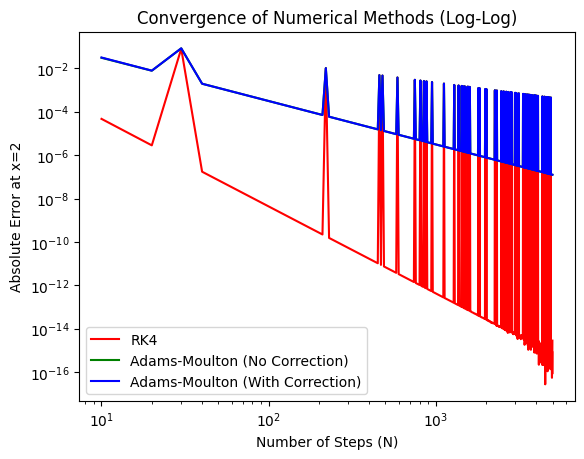

In [12]:
# Logarithmic Plot absolute error vs steps using loglog function of the matplotlib
plt.loglog(steps, errors_rk4, label="RK4", color="red")
plt.loglog(steps, errors_am, label="Adams-Moulton (No Correction)", color="green")
plt.loglog(steps, errors_amc, label="Adams-Moulton (With Correction)", color="blue")
plt.xlabel("Number of Steps (N)")
plt.ylabel("Absolute Error at x=2")
plt.title("Convergence of Numerical Methods (Log-Log)")
plt.legend()
plt.show()

We can see in the plot that there is a difference of error of order $10^{2}$ between RK4 and Adam's method at the beginning and at the end of the steps the error for RK4 decreases to order of $10^{-16}$ while the convergence difference between RK4 and Adam's method at the end is around $10^{10}$ .

Next, we have to Plot the error vs the number of function evaluations ( 4N for RK4, N for Adams without corrections, 2N as a minimum for Adams with corrections) and discuss which method is most efficient.

In [ ]:
# Plot error vs function evaluations
plt.plot(func_eval_rk4, errors_rk4, label="RK4", color="red")
plt.plot(func_eval_am, errors_am, label="Adams-Moulton (No Correction)", color="green")
plt.plot(func_eval_amc, errors_amc, label="Adams-Moulton (With Correction)", color="blue")
plt.xlabel("Number of Function Evaluations")
plt.ylabel("Absolute Error at x=2")
plt.title("Efficiency of Numerical Methods")
plt.legend()
plt.show()